In [1]:
## importing necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train=pd.read_csv(r"D:\New folder\Data (D)\Personal files\Data science Materials\ICT Academy_Materials\Data sets\Virtual competition\train_ctrUa4K.csv")

In [3]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df_test=pd.read_csv(r"D:\New folder\Data (D)\Personal files\Data science Materials\ICT Academy_Materials\Data sets\Virtual competition\test_lAUu6dG.csv")

In [5]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
original_train=df_train.copy()
original_test=df_test.copy()

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
df_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
df_train.shape,df_test.shape

((614, 13), (367, 12))

In [11]:
df_train.Loan_Status.value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

Text(0.5, 1.0, 'Target Distribution')

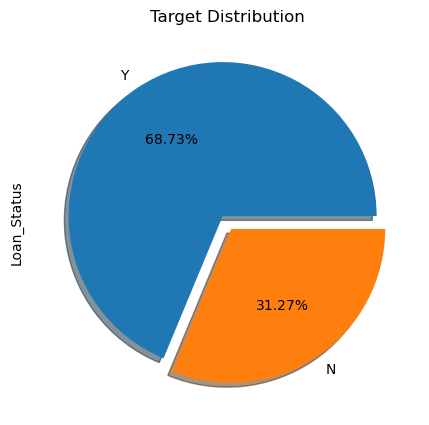

In [12]:
plt.figure(figsize=(5,5))
df_train['Loan_Status'].value_counts().plot.pie(explode=[0.05,0.05],autopct='%1.2f%%',shadow=True).set_title("Target Distribution")

## visualization of Catogorical values

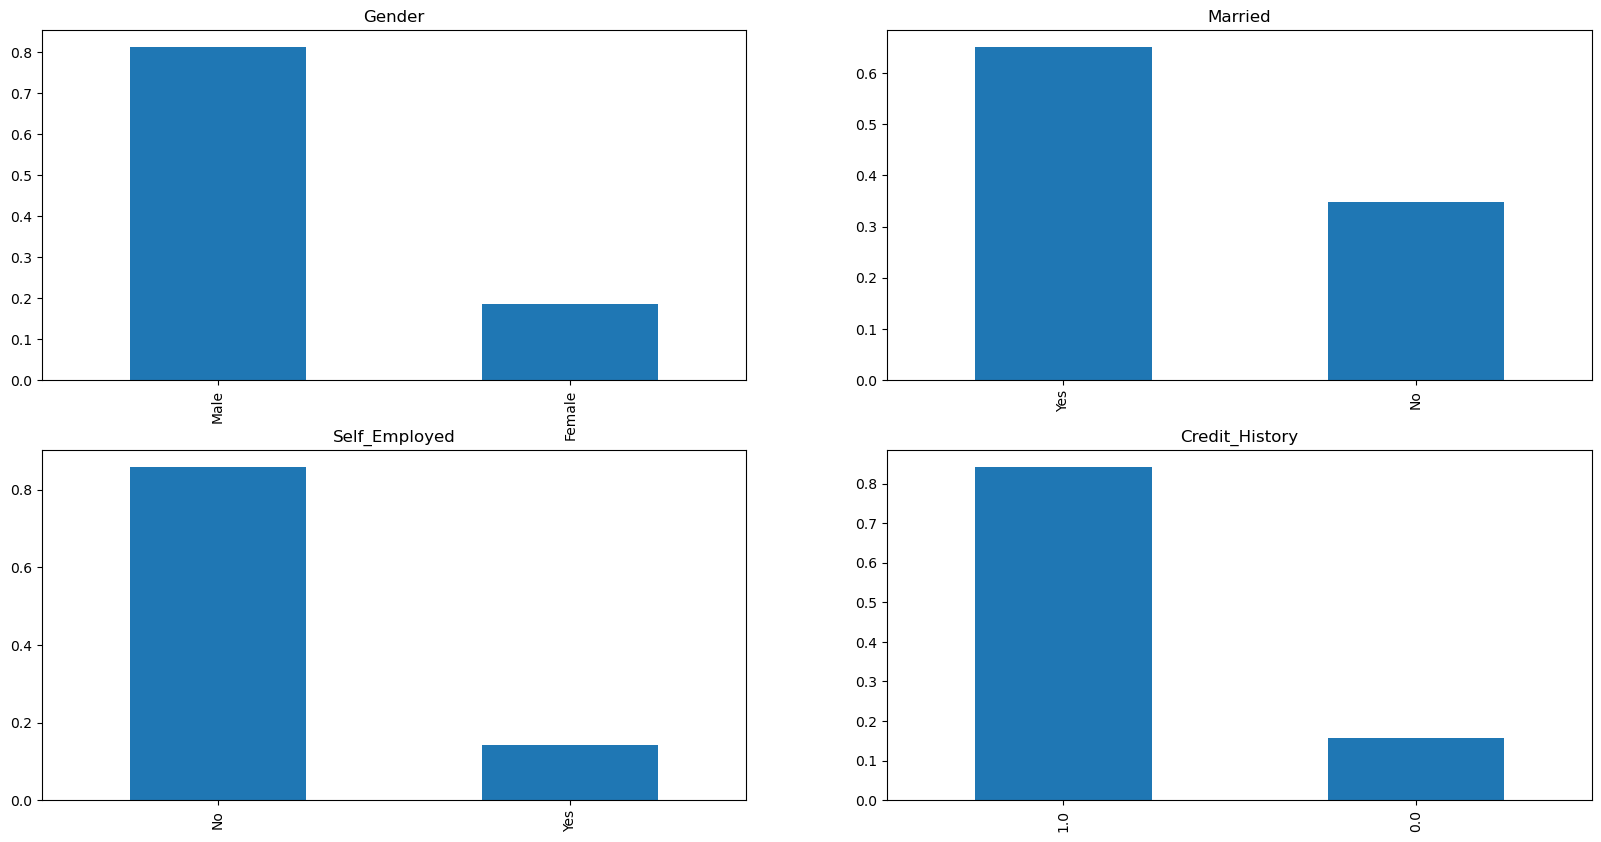

In [13]:
plt.figure(1)
plt.subplot(221)
df_train.Gender.value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(222)
df_train.Married.value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
df_train.Self_Employed.value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(224)
df_train.Credit_History.value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

## vuisztlianoin of Oirandl Vaeuls

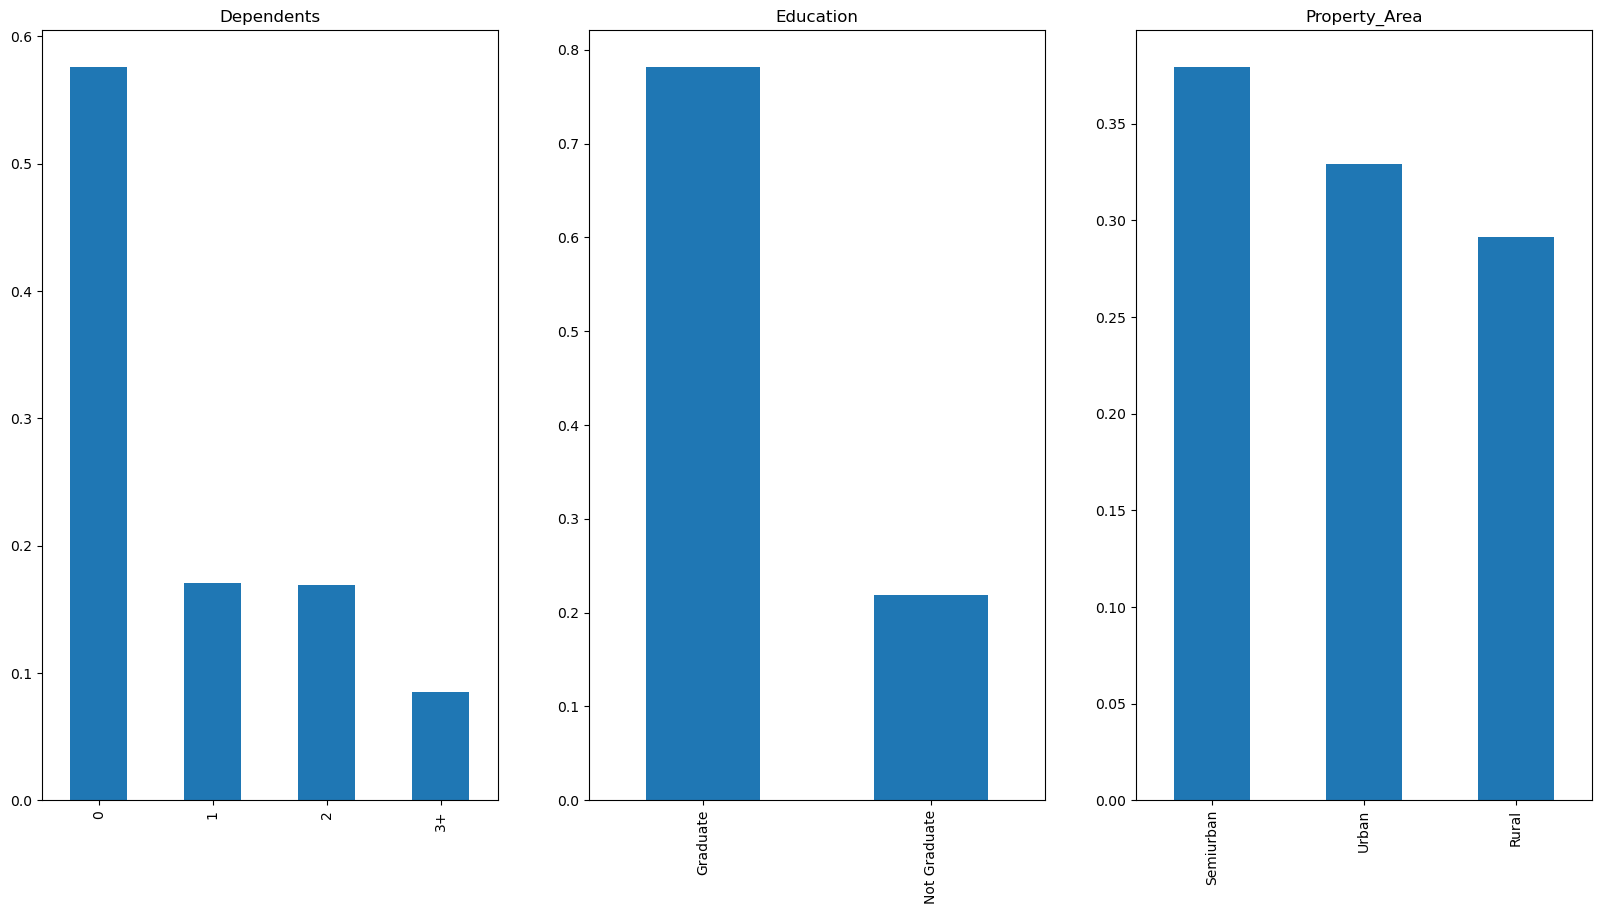

In [14]:
plt.figure(1)
plt.subplot(131)
df_train.Dependents.value_counts(normalize=True).plot.bar(figsize=(20,10),title='Dependents')
plt.subplot(132)
df_train.Education.value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
df_train.Property_Area.value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

## vuisztlianoin of Nueicamrl Vaeuls

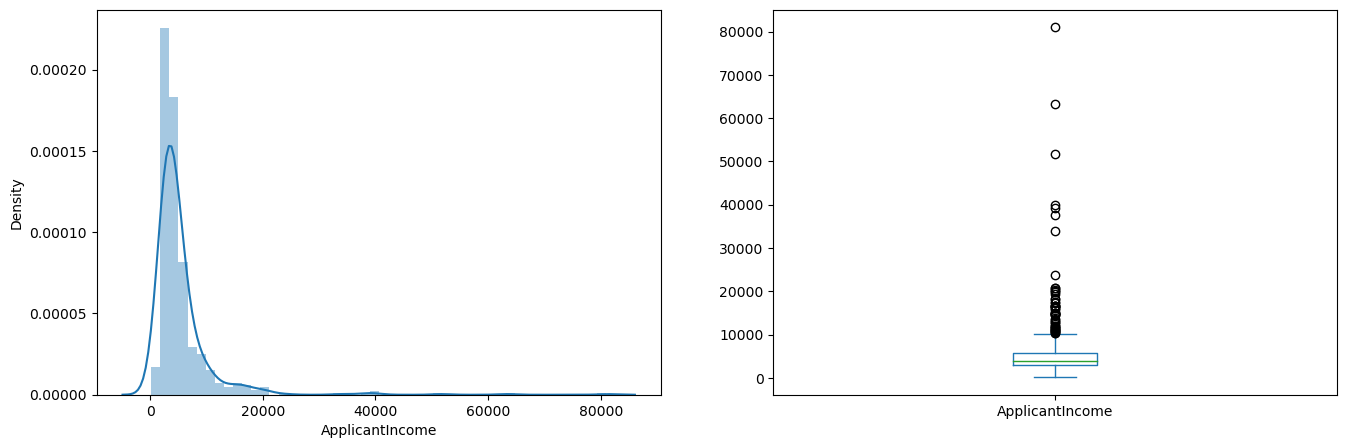

In [15]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df_train.ApplicantIncome);
plt.subplot(122)
df_train.ApplicantIncome.plot.box(figsize=(16,5))
plt.show()

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

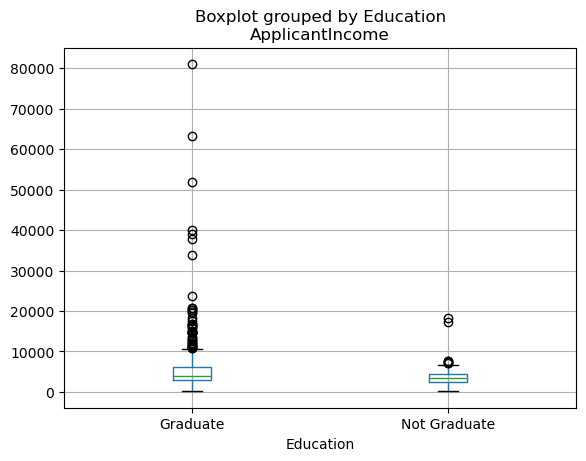

In [16]:
df_train.boxplot(column='ApplicantIncome',by='Education')

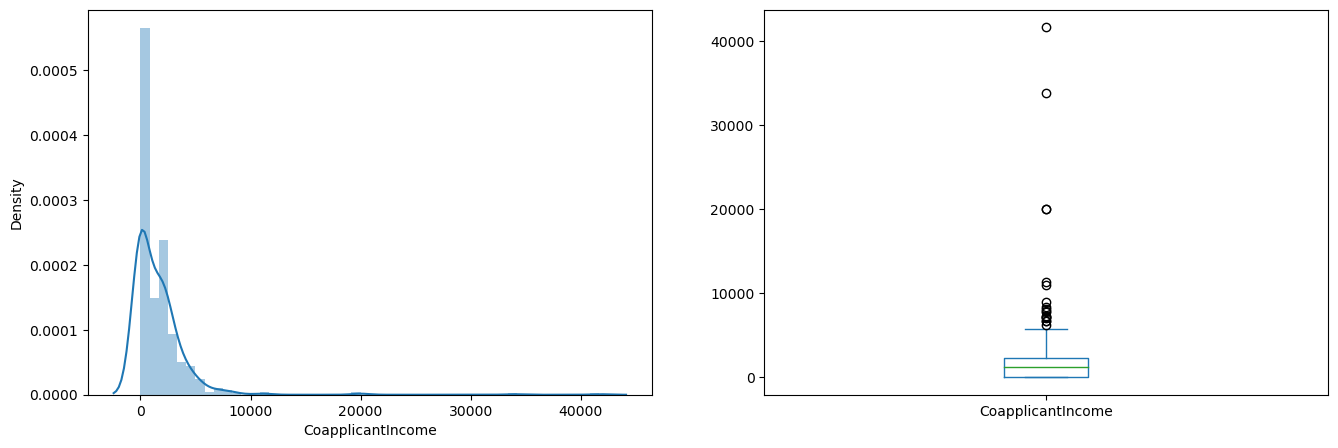

In [17]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df_train.CoapplicantIncome);
plt.subplot(122)
df_train.CoapplicantIncome.plot.box(figsize=(16,5))
plt.show()

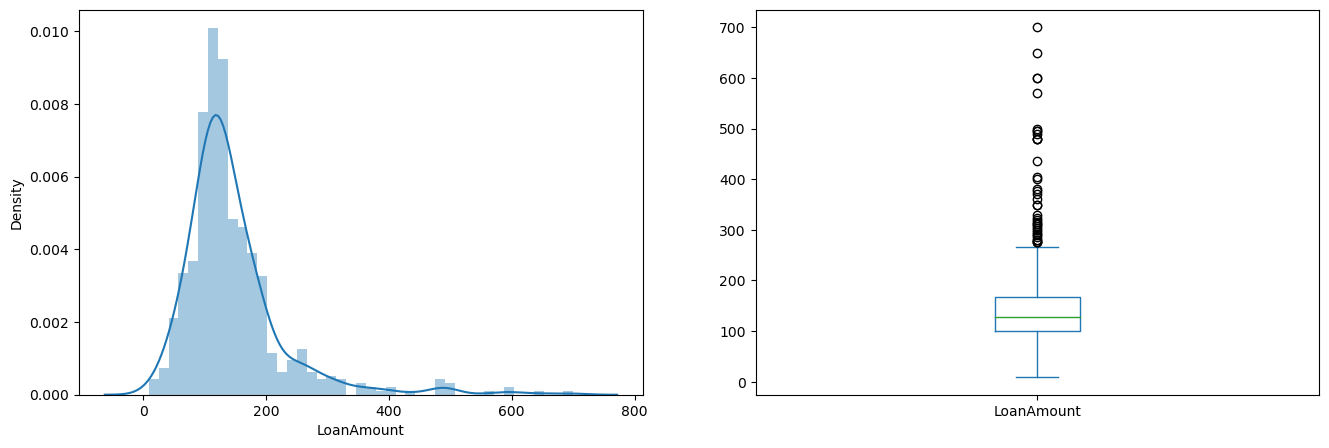

In [18]:
plt.figure(1)
plt.subplot(121)
df=df_train.dropna()
sns.distplot(df_train.LoanAmount);
plt.subplot(122)
df_train.LoanAmount.plot.box(figsize=(16,5))
plt.show()

In [19]:
df_train.shape,df_test.shape

((614, 13), (367, 12))

## Comparison of Catagorical values and target Vector

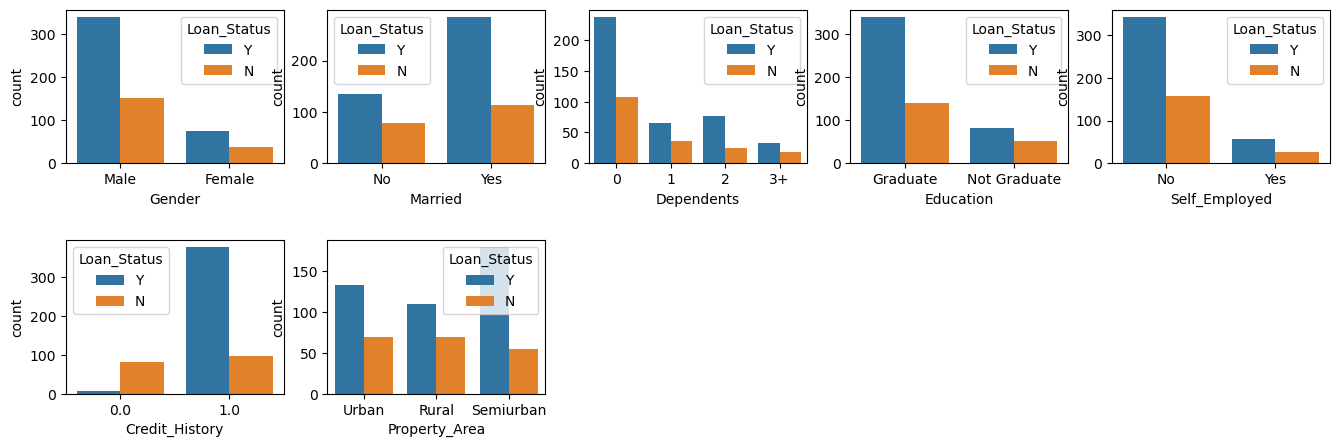

In [20]:
plt.figure(1)
plt.subplots_adjust(left=0.125, bottom=0.1, right=2.1, top=0.9, wspace=0.2, hspace=0.5)
plt.subplot(251)
sns.countplot(x=df_train.Gender,hue=df_train.Loan_Status)
plt.subplot(252)
sns.countplot(x=df_train.Married,hue=df_train.Loan_Status)
plt.subplot(253)
sns.countplot(x=df_train.Dependents.astype('category'),hue=df_train.Loan_Status)
plt.subplot(254)
sns.countplot(x=df_train.Education,hue=df_train.Loan_Status)
plt.subplot(255)
sns.countplot(x=df_train.Self_Employed,hue=df_train.Loan_Status)
plt.subplot(256)
sns.countplot(x=df_train.Credit_History,hue=df_train.Loan_Status)
plt.subplot(257)
sns.countplot(x=df_train.Property_Area,hue=df_train.Loan_Status)
plt.show()

## comparison of numerical values and target variable

Text(0.5, 1.0, 'Applicant Income Vs Loan Status')

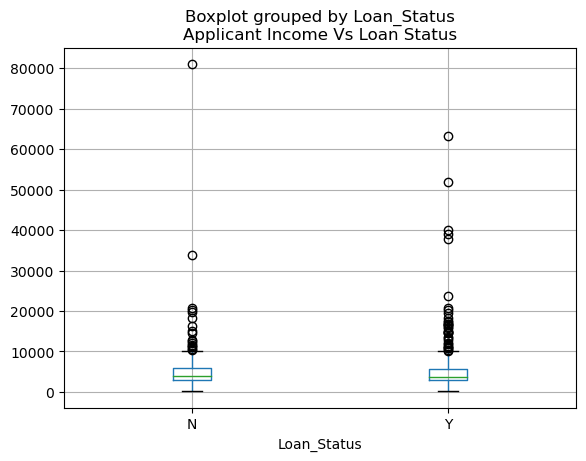

In [21]:
df_train.boxplot(column='ApplicantIncome',by='Loan_Status')
plt.title("Applicant Income Vs Loan Status")

Text(0.5, 1.0, 'Coapplicant Income Vs Loan Status')

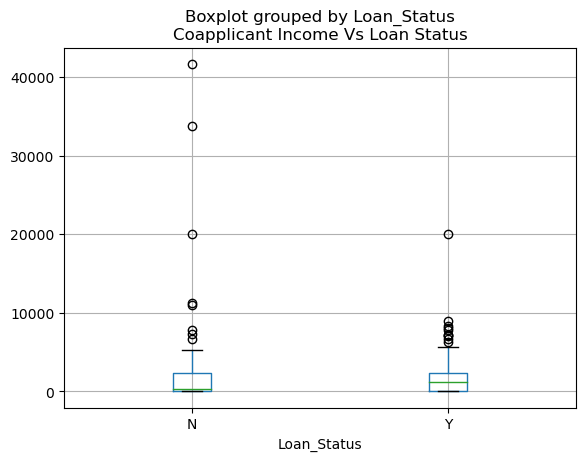

In [22]:
df_train.boxplot(column='CoapplicantIncome',by='Loan_Status')
plt.title("Coapplicant Income Vs Loan Status")

Text(0.5, 1.0, 'Loan Amount Vs Loan Status')

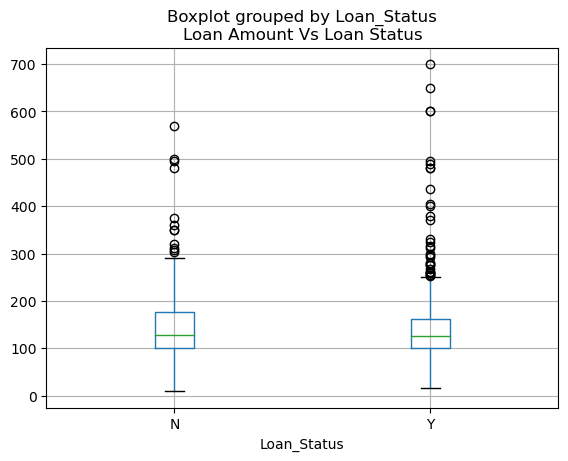

In [23]:
df_train.boxplot(column='LoanAmount',by='Loan_Status')
plt.title("Loan Amount Vs Loan Status")

In [24]:
df_train.shape,df_test.shape

((614, 13), (367, 12))

In [25]:
df_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [26]:
df_train.Dependents.replace('3+',3,inplace=True)
df_test.Dependents.replace('3+',3,inplace=True)
df_train.Loan_Status.replace('N',0,inplace=True)
df_train.Loan_Status.replace('Y',1,inplace=True)

<AxesSubplot:>

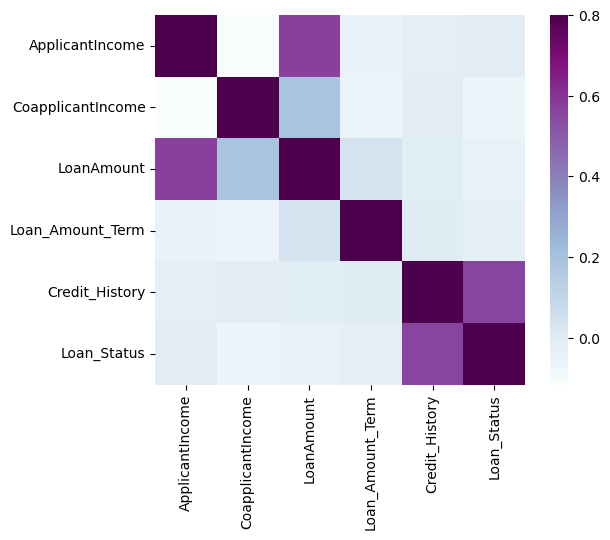

In [27]:
matrix=df_train.corr()
sns.heatmap(matrix,vmax=0.8,square=True,cmap="BuPu")

## Data Preprocessing

In [28]:
# Checking for missing data

In [29]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [30]:
# Filling the missing data

In [31]:
df_train.Gender.fillna(df_train.Gender.mode()[0],inplace=True)
df_train.Married.fillna(df_train.Married.mode()[0],inplace=True)
df_train.Dependents.fillna(df_train.Dependents.mode()[0],inplace=True)
df_train.Self_Employed.fillna(df_train.Self_Employed.mode()[0],inplace=True)
df_train.Credit_History.fillna(df_train.Credit_History.mode()[0],inplace=True)

In [32]:
df_train.Loan_Amount_Term.fillna(df_train.Loan_Amount_Term.mode()[0],inplace=True)
df_train.LoanAmount.fillna(df_train.LoanAmount.median(),inplace=True)

In [33]:
df_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [34]:
df_test.Gender.fillna(df_train.Gender.mode()[0],inplace=True)
df_test.Married.fillna(df_train.Married.mode()[0],inplace=True)
df_test.Dependents.fillna(df_train.Dependents.mode()[0],inplace=True)
df_test.Self_Employed.fillna(df_train.Self_Employed.mode()[0],inplace=True)
df_test.Credit_History.fillna(df_train.Credit_History.mode()[0],inplace=True)
df_test.Loan_Amount_Term.fillna(df_train.Loan_Amount_Term.mode()[0],inplace=True)
df_test.LoanAmount.fillna(df_train.LoanAmount.median(),inplace=True)

In [35]:
df_test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

##### Altering the loan Amount to be more compatible for Machine Learning by taking the logarithmic value,which makes it a much more normal distribution. 

<AxesSubplot:>

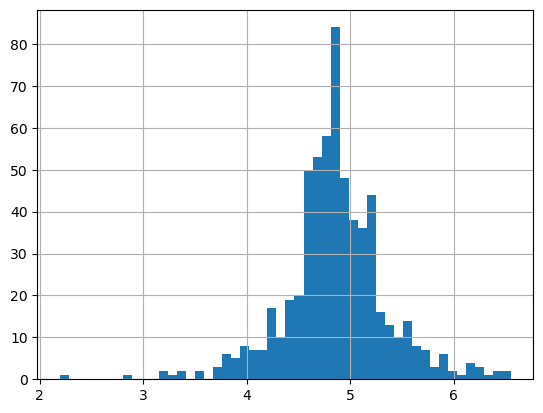

In [36]:
df_train.LoanAmount_log=np.log(df_train.LoanAmount)
df_train.LoanAmount_log.hist(bins=50)

In [37]:
df_test.LoanAmount_log=np.log(df_test.LoanAmount)

In [38]:
df_test.shape,df_train.shape

((367, 12), (614, 13))

In [39]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [40]:
df_train=df_train.drop('Loan_ID',axis=1)
df_test=df_test.drop('Loan_ID',axis=1)

## Building a machine learning model

In [41]:
x=df_train.drop('Loan_Status',1)
y=df_train.Loan_Status

In [42]:
df_test.shape,df_train.shape

((367, 11), (614, 12))

In [43]:
# One-hot Encoding
x=pd.get_dummies(x)
df_train=pd.get_dummies(df_train)
df_test=pd.get_dummies(df_test)

In [44]:
x.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_3', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [45]:
df_test.shape,df_train.shape

((367, 20), (614, 21))

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_cv,y_train,y_cv=train_test_split(x,y,random_state=42,test_size=0.25)

In [48]:
# Logistic Regression Model

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [50]:
log_reg = LogisticRegression(max_iter=300)
log_reg.fit(x_train, y_train)
cv_pred = log_reg.predict(x_cv)

In [51]:
print(confusion_matrix(y_cv,cv_pred),"- confusion_matrix")
print("accuracy_score",accuracy_score(y_cv,cv_pred))

[[21 33]
 [ 2 98]] - confusion_matrix
accuracy_score 0.7727272727272727


In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_cv,cv_pred))

              precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154



### Predicting the Loan Status from the test data

In [53]:
pred_test=log_reg.predict(df_test)

In [54]:
# Saving the Predicted Values into a csv file

In [55]:
submission=pd.read_csv(r"D:\New folder\Data (D)\Personal files\Data science Materials\ICT Academy_Materials\Data sets\Virtual competition\sample_submission_49d68Cx.csv")

In [56]:
submission['Loan_Status']=pred_test
submission.Loan_ID=original_test.Loan_ID

In [57]:
submission.Loan_Status.replace(0,'N',inplace=True)
submission.Loan_Status.replace(1,'Y',inplace=True)

In [58]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv(r'D:\New folder\Data (D)\Personal files\Data science Materials\ICT Academy_Materials\Data sets\Virtual competition\Assignment_final.csv')

### Predicted Loan Status

In [59]:
final=pd.read_csv(r"D:\New folder\Data (D)\Personal files\Data science Materials\ICT Academy_Materials\Data sets\Virtual competition\Assignment_final.csv",index_col='Loan_ID').drop('Unnamed: 0',1)
final.head()

,Loan_Status
Loan_ID,
LP001015,Y
LP001022,Y
LP001031,Y
LP001035,Y
LP001051,Y
